In [13]:
output_dir = "../../figures/figureS2/"


import itertools
import pathlib

import matplotlib as mpl
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

savefig_args = {
    "dpi": 300,
    "bbox_inches": "tight",
    "pad_inches": 0,
    "transparent": True,
}
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
output_suffix = ""
output_formats = [".png", ".svg"]
sc.settings.figdir = output_dir
sc.set_figure_params(format="svg", transparent=True)
sc.settings.figdir = output_dir
sc.set_figure_params(format="svg", transparent=True)
sc.set_figure_params(dpi_save=300)


def save_figure(
    fig,
    name,
    output_dir=output_dir,
    output_suffix=output_suffix,
    output_formats=output_formats,
    savefig_args=savefig_args,
):
    for output_format in output_formats:
        fig.savefig(
            output_dir + "/" + name + output_suffix + output_format, **savefig_args
        )
    return None


pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 100)
plt.style.use("../../scripts/paper.mplstyle")
width = plt.rcParams["figure.figsize"][0]
height = plt.rcParams["figure.figsize"][1]
%run ../../scripts/btreceptor_draw.py
%run ../../scripts/btreceptor_sequences.py
%run ../../scripts/plotting_helper.py

<Figure size 180x180 with 0 Axes>

In [13]:
adata = sc.read_h5ad("../data/bcells.h5ad")

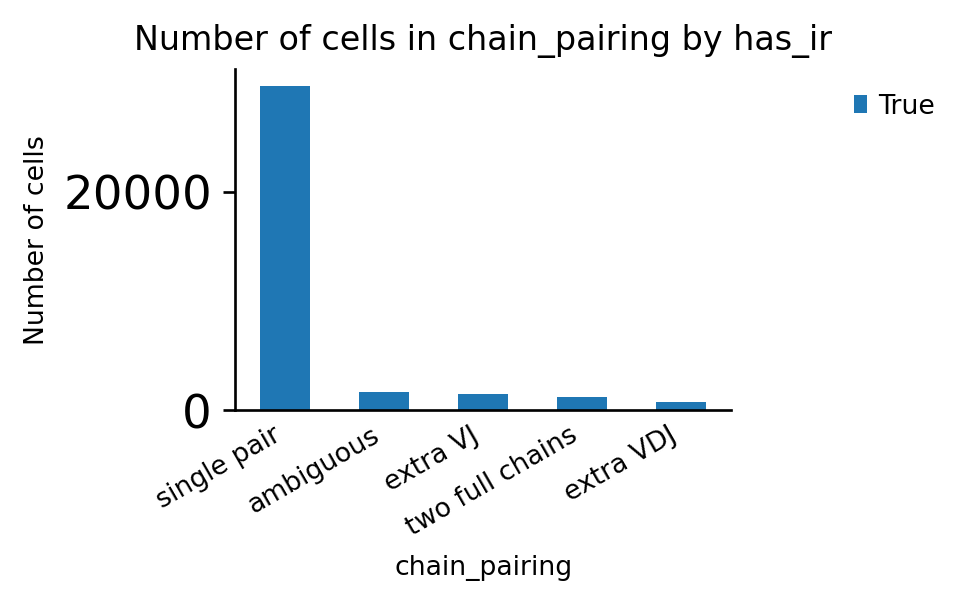

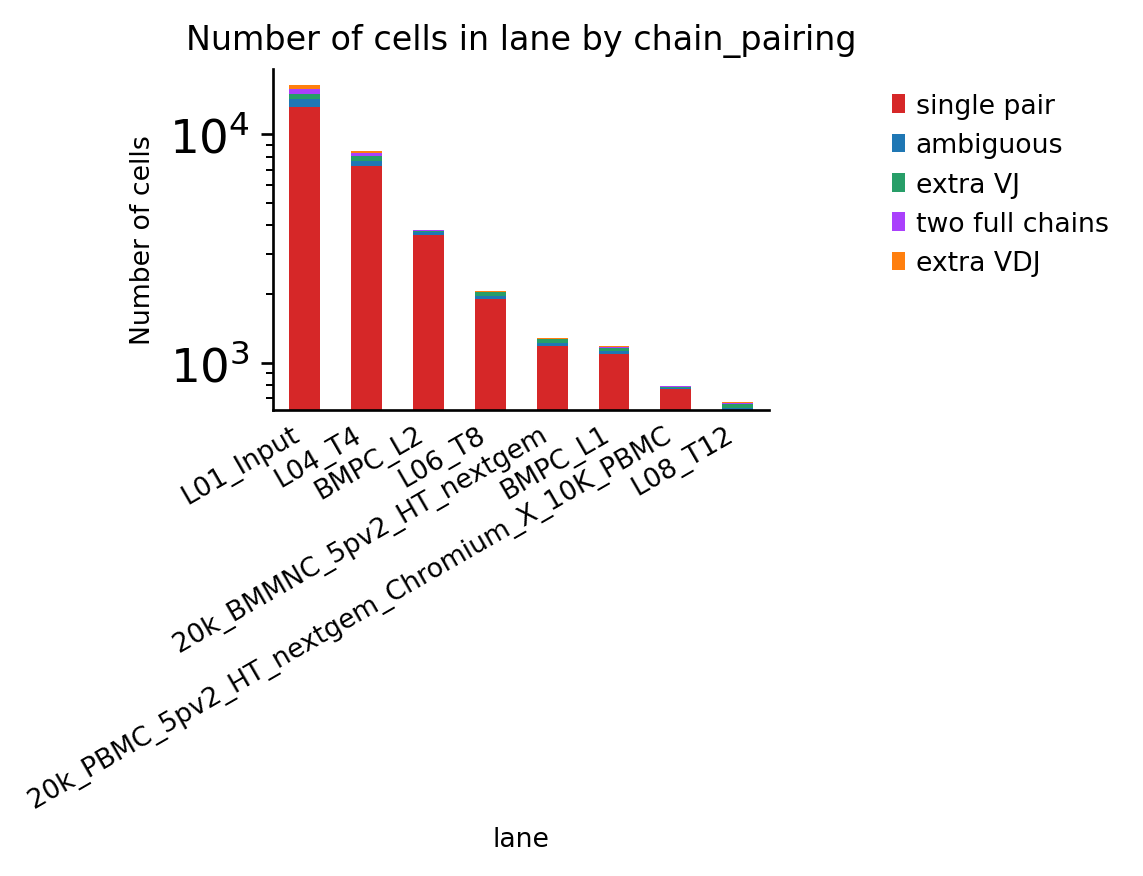

In [22]:
ax = ir.pl.group_abundance(adata, groupby="chain_pairing")
ax = ir.pl.group_abundance(adata, groupby="lane", target_col="chain_pairing")
ax.set_yscale("log")

In [33]:
data = pd.DataFrame(
    adata.obs.groupby("lane").chain_pairing.value_counts(normalize=True)
).reset_index()

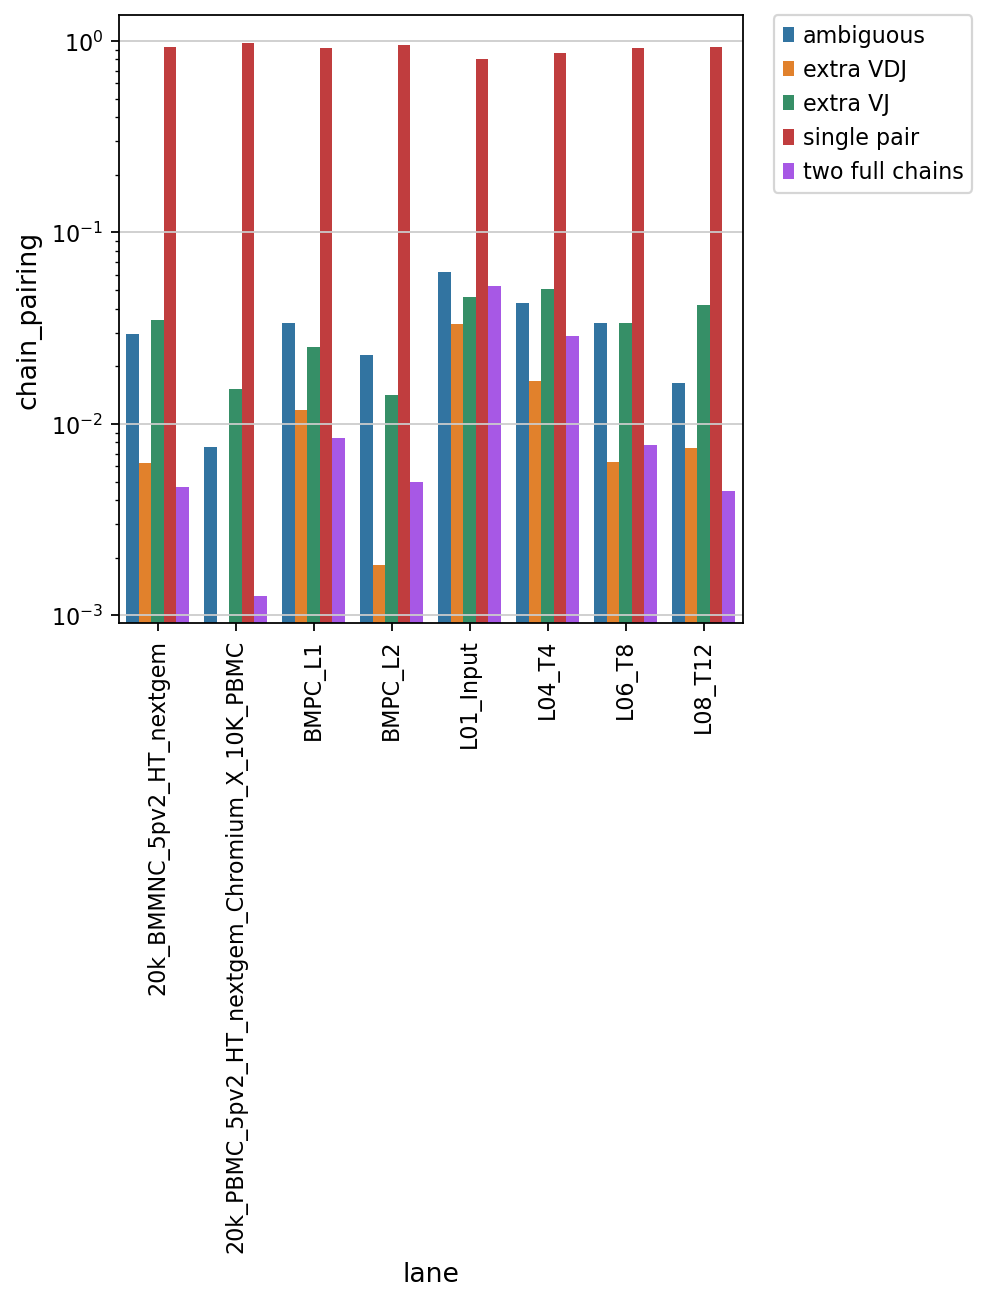

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(data=data, x="lane", y="chain_pairing", hue="level_1")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
locs, labels = plt.xticks()

plt.setp(labels, rotation=90)
plt.yscale("log")

In [4]:
adata = adata[adata.obs.sample_id.str.contains("Day")]

In [8]:
adata.obs.IR

AnnData object with n_obs × n_vars = 27581 × 30019
    obs: 'multi_chain', 'extra_chains', 'has_ir', 'high_confidence', 'is_cell', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'lane', 'batch', 

In [5]:
sweep = np.linspace(0.1, 1, 10)

In [6]:
series_list = []
for similarity_cutoff in sweep:
    _adata = adata_add_lineages_from_IR(adata, similarity_cutoff=similarity_cutoff)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


KeyError: 'v_call_no_allele'

In [ ]:
df = pd.DataFrame(series_list)

In [ ]:
df.mean(axis=1)

In [ ]:
df.sum(axis=1)

ValueError: x and y must have same first dimension, but have shapes (3596,) and (30682,)

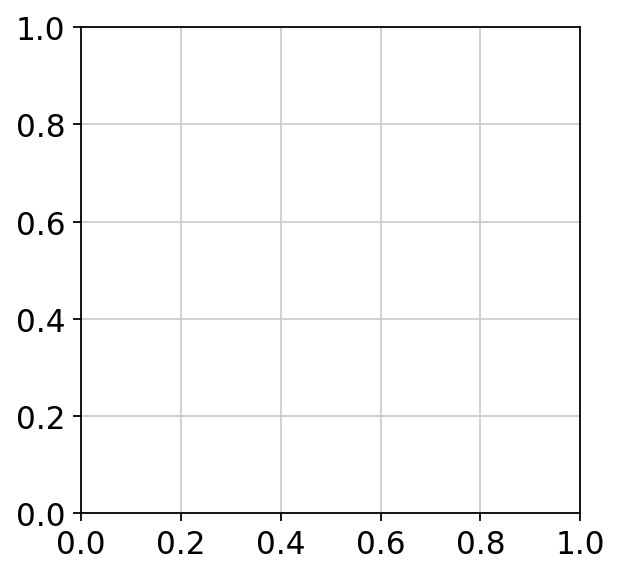

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax.plot(df.i[0], series_list[-1])

In [4]:
df = pd.read_table("../data/immcantation.tsv.gz")

# valid v sequence start
df = df.dropna(subset="IR_VDJ_1_v_sequence_start")

bcells = sc.read_h5ad("../data/bcells.h5ad")

df = df[df["Unnamed: 0"].isin(bcells.obs.index)]

# Variance in v identity metric

In [5]:
df["fraction_v_mutated"] = 1 - df["IR_VDJ_1_v_identity"]

In [6]:
subset = bcells.obs[["bcelltype", "bcelltype_complex", "sample_id", "clone_id"]]
df = pd.merge(df, subset, left_on="Unnamed: 0", right_index=True)

In [7]:
detected_input = bcells.obs[bcells.obs.sample_id == "Day 0"].clone_id
detected_output = bcells.obs[
    (bcells.obs.sample_id != "Day 0") & (bcells.obs.sample_id.str.contains("Day"))
].clone_id
persistent_clones = set(detected_input) & set(detected_output)
persistent_clones = bcells.obs[bcells.obs.clone_id.isin(persistent_clones)]

In [35]:
df

,Unnamed: 0,multi_chain,extra_chains,has_ir,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_cdr1,IR_VJ_2_cdr1,...,IR_VJ_2_vj_in_frame,IR_VDJ_1_vj_in_frame,IR_VDJ_2_vj_in_frame,lane,batch,fraction_v_mutated,bcelltype,bcelltype_complex,sample_id,clone_id
1,AAACCTGAGAAGATTC-1-0,False,[],True,NaN,NaN,IGHM,NaN,NaN,NaN,...,NaN,True,NaN,L01_Input,0,0.00000,Naive B cell,Naive B cell (Transitional),Day 0,0
4,AAACCTGAGATAGGAG-1-0,False,[],True,NaN,NaN,IGHM,NaN,NaN,NaN,...,NaN,True,NaN,L01_Input,0,0.00000,Non-Switched Memory B cell,Non-Switched Memory B cell (CHL1+),Day 0,3
5,AAACCTGAGCACCGTC-1-0,False,[],True,NaN,NaN,IGHM,NaN,NaN,NaN,...,NaN,True,NaN,L01_Input,0,0.00000,Naive B cell,Naive B cell,Day 0,4
6,AAACCTGAGCCACTAT-1-0,False,[],True,NaN,NaN,IGHM,NaN,NaN,NaN,...,NaN,True,NaN,L01_Input,0,0.00000,Naive B cell,Naive B cell (Transitional),Day 0,5
7,AAACCTGAGCTAACTC-1-0,False,[],True,NaN,NaN,IGHM,NaN,NaN,NaN,...,NaN,True,NaN,L01_Input,0,0.00000,Naive B cell,Naive B cell (Activated|DUSP2-),Day 0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61328,TTGTAGGCATCTACGA-1-3,False,[],True,NaN,NaN,IGHA2,NaN,NaN,NaN,...,NaN,True,NaN,L08_T12,3,0.07586,iv Plasma B cell,iv Plasma B cell,Day 12,28722
61351,TTTACTGAGGACAGCT-1-3,False,[],True,NaN,NaN,IGHG1,NaN,NaN,NaN,...,NaN,True,NaN,L08_T12,3,0.02034,iv GC B cell,iv GC B cell (P4HA2+),Day 12,26457
61370,TTTACTGTCCTTGGTC-1-3,False,[],True,NaN,NaN,IGHM,NaN,NaN,NaN,...,NaN,True,NaN,L08_T12,3,0.00678,iv GC B cell,iv GC B cell (P4HA2+),Day 12,28723
61384,TTTATGCCACACAGAG-1-3,False,[],True,NaN,NaN,IGHM,NaN,NaN,NaN,...,NaN,True,NaN,L08_T12,3,0.04392,iv Plasmablast,iv Plasmablast (cycling),Day 12,28618


In [40]:
group = 'sample_id'
df = df[df.sample_id.str.contains("Day")]
resampled_df = df.groupby('sample_id', observed=True).sample(n=3000, replace=True)

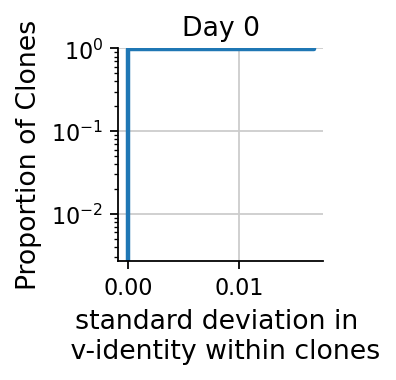

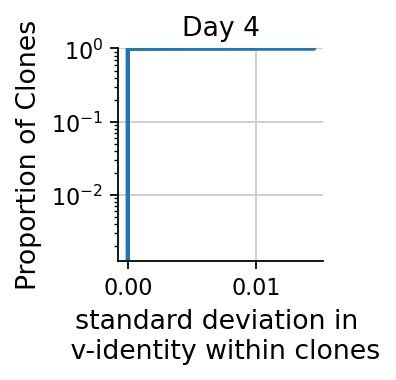

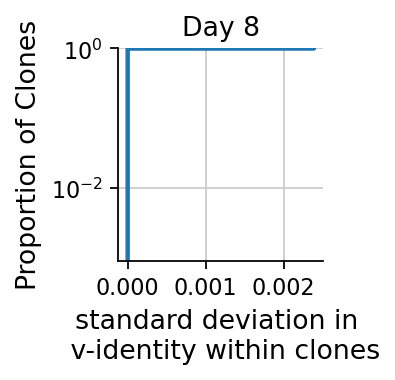

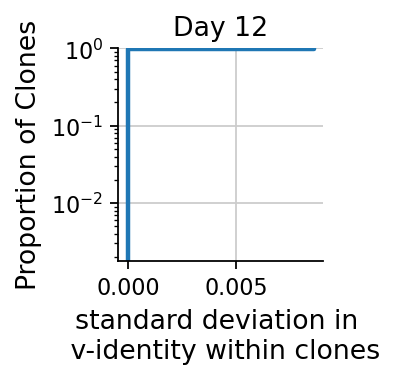

In [41]:
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt

for i in df.sample_id.unique():
    data = resampled_df[resampled_df.sample_id == i]
    g = sns.displot(
        data.groupby(["IR_VDJ_1_clone_id"])["fraction_v_mutated"].std().dropna(),
        kind="ecdf",
        complementary=False,
        stat="proportion", lw = 2,height = 2.25
    )
    plt.yscale("log")
    plt.xlabel("standard deviation in \n v-identity within clones")
    plt.title(i)
    plt.ylabel('Proportion of Clones')
    save_figure(g.fig, "{}_ecdf_mutation".format(i))

In [ ]:
# Downsampled to Lane 
for i in df.sample_id.unique():
    data = df[df.sample_id == i]
    g = sns.displot(
        data.groupby(["IR_VDJ_1_clone_id"])["fraction_v_mutated"].std().dropna(),
        kind="ecdf",
        complementary=False,
        stat="proportion", lw = 2,height = 2.25
    )
    plt.yscale("log")
    plt.xlabel("standard deviation in \n v-identity within clones")
    plt.title(i)
    plt.ylabel('Proportion of Clones')
    save_figure(g.fig, "{}_ecdf_mutation".format(i))

In [10]:
import numpy as np

/tmp/ipykernel_21383/158682288.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IR_VDJ_1_clone_id'] = np.random.permutation(data["IR_VDJ_1_clone_id"])
/tmp/ipykernel_21383/158682288.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IR_VDJ_1_clone_id'] = np.random.permutation(data["IR_VDJ_1_clone_id"])
/tmp/ipykernel_21383/158682288.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

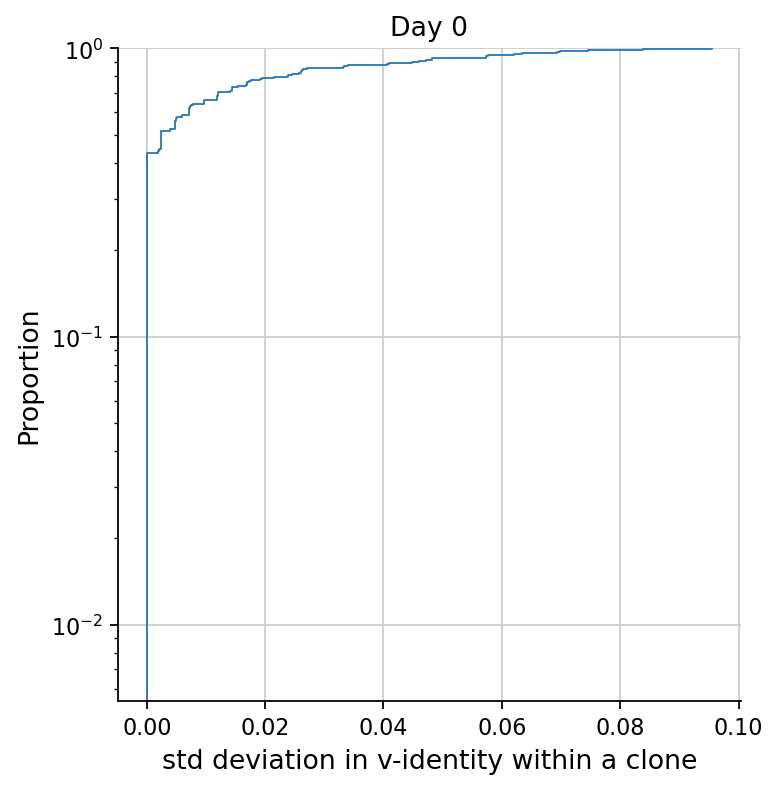

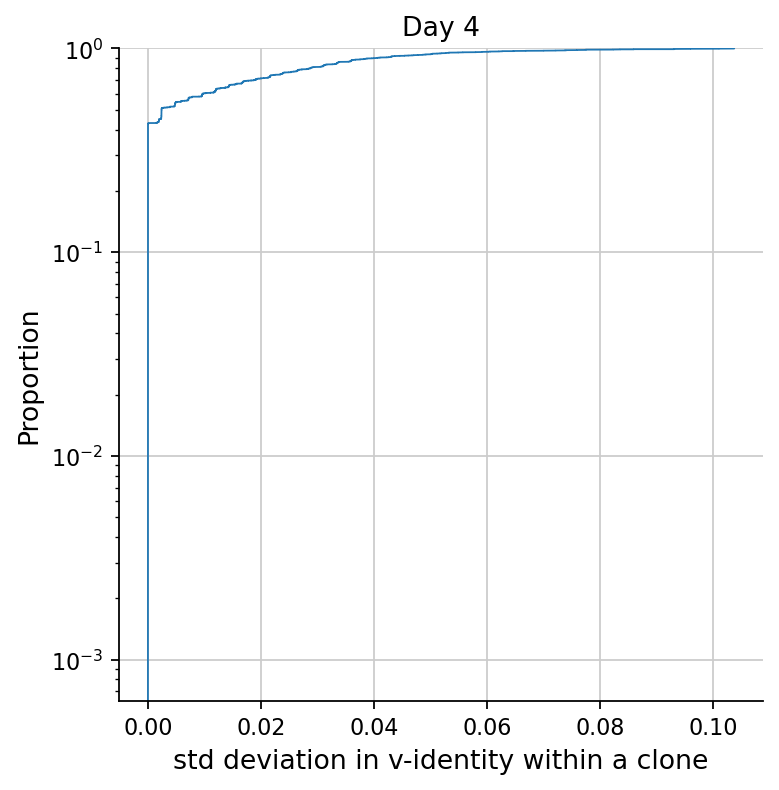

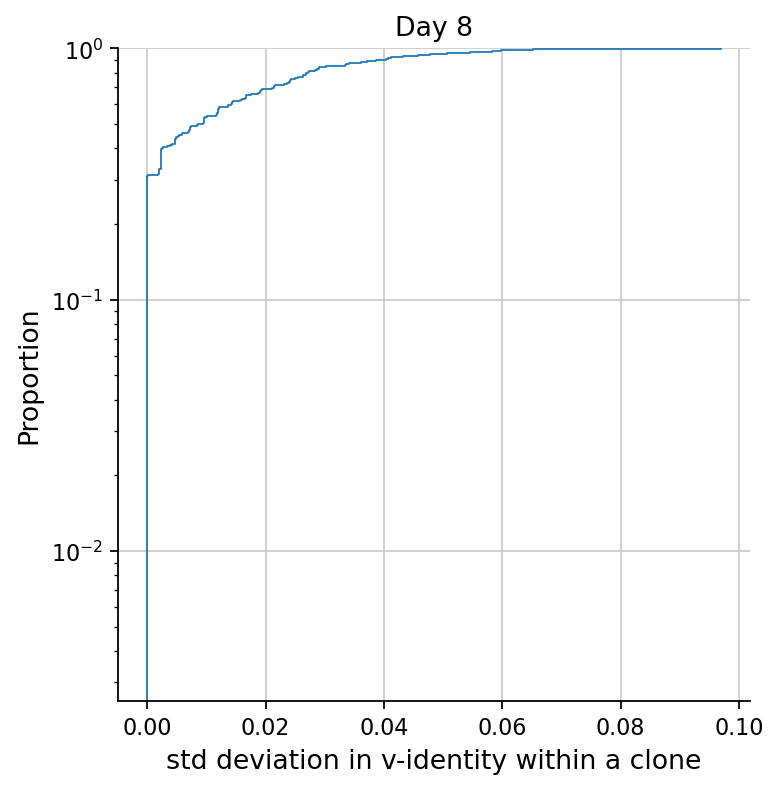

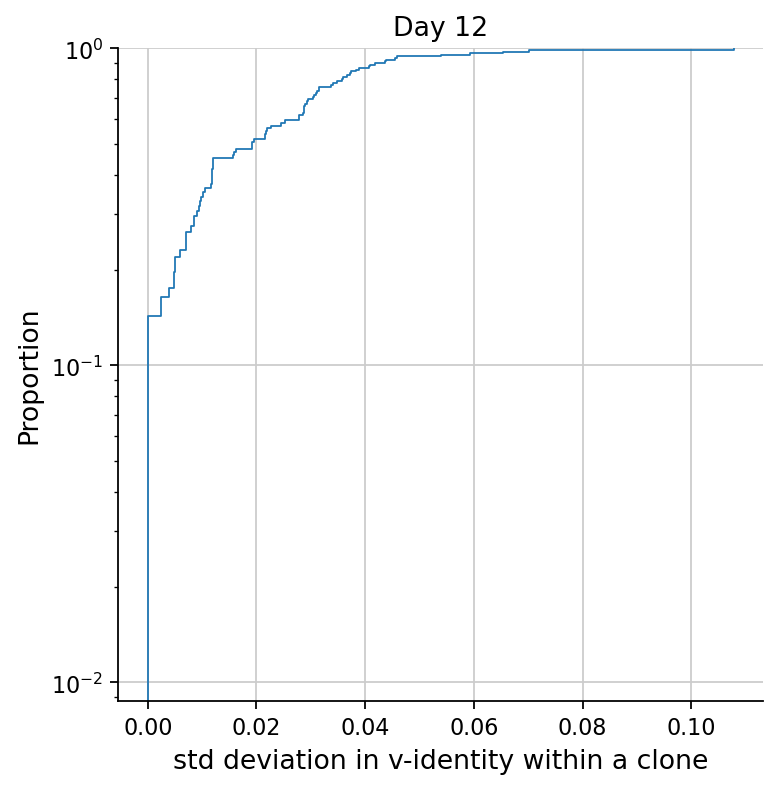

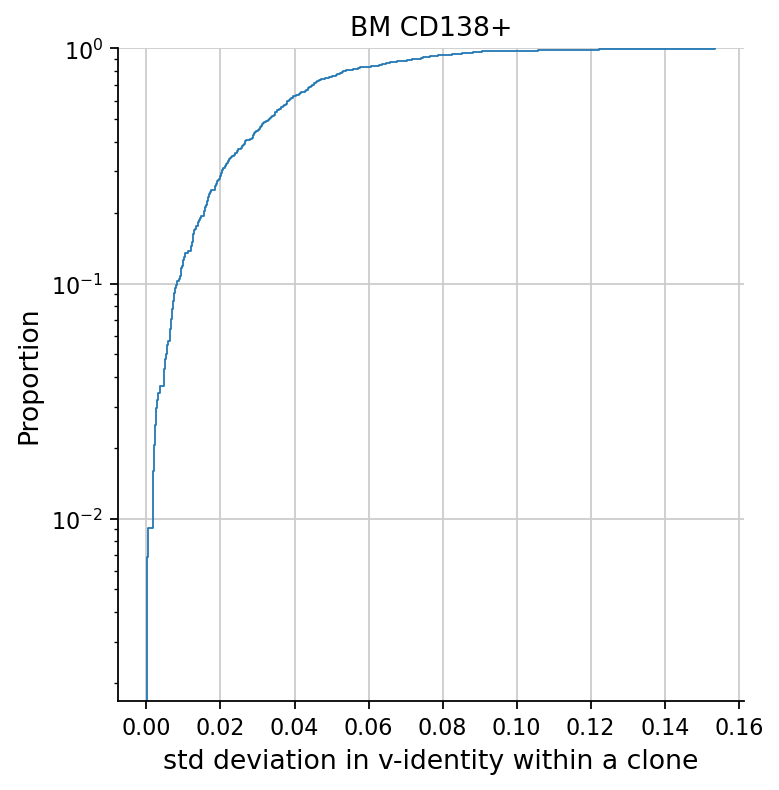

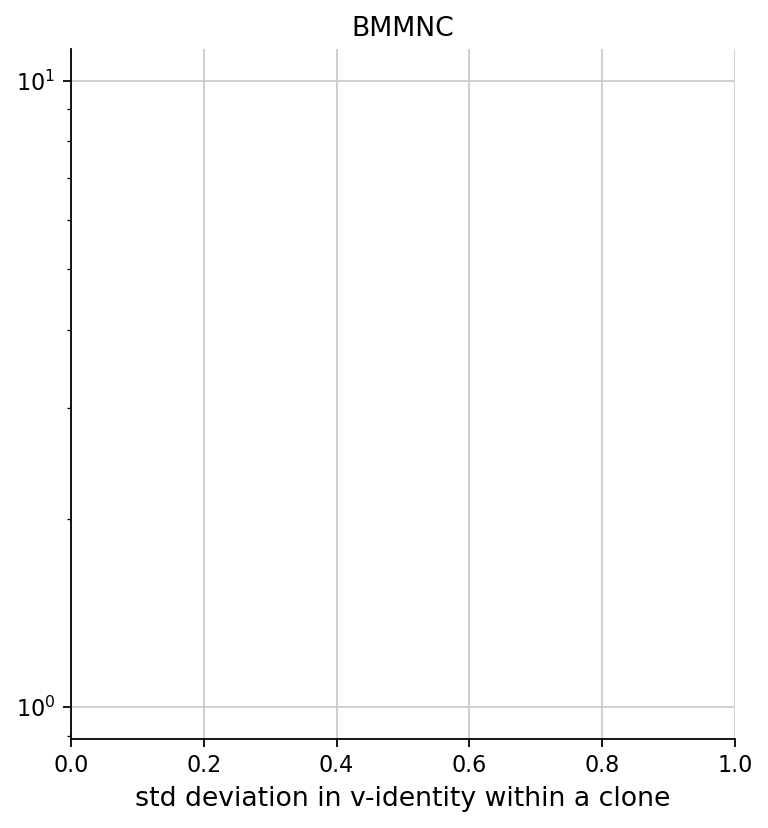

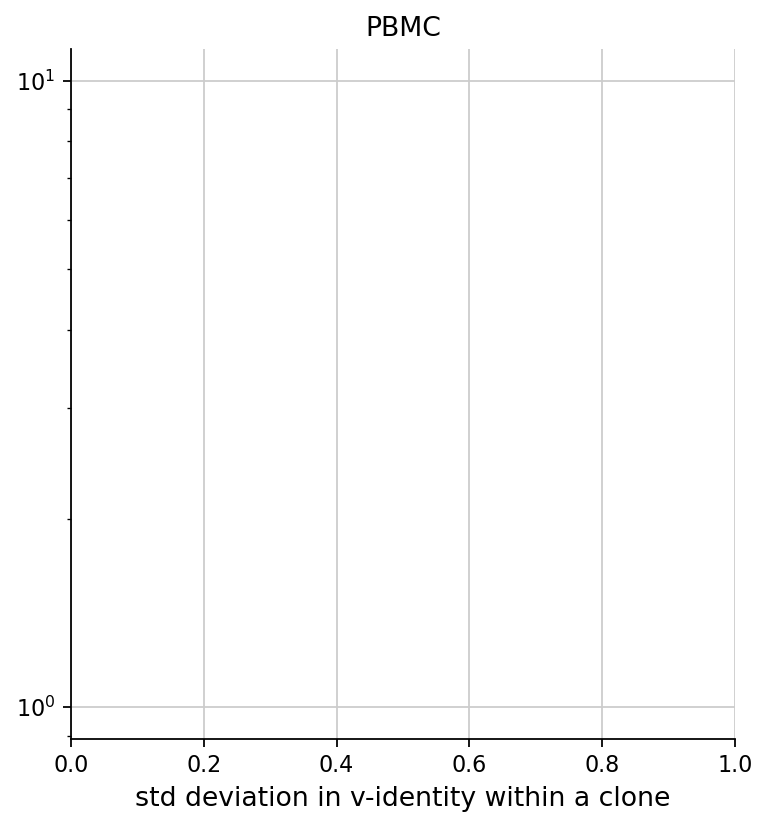

In [11]:
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt

for i in df.sample_id.unique():
    data = df[df.sample_id == i]
    data["IR_VDJ_1_clone_id"] = np.random.permutation(data["IR_VDJ_1_clone_id"])
    g = sns.displot(
        data.groupby(["IR_VDJ_1_clone_id"])["fraction_v_mutated"].std().dropna(),
        kind="ecdf",
        complementary=False,
        stat="proportion",
    )
    plt.yscale("log")
    plt.xlabel("std deviation in v-identity within a clone")
    plt.title(i)

In [12]:
df

,Unnamed: 0,multi_chain,extra_chains,has_ir,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_cdr1,IR_VJ_2_cdr1,...,IR_VJ_2_vj_in_frame,IR_VDJ_1_vj_in_frame,IR_VDJ_2_vj_in_frame,lane,batch,fraction_v_mutated,bcelltype,bcelltype_complex,sample_id,clone_id
1,AAACCTGAGAAGATTC-1-0,False,[],True,NaN,NaN,IGHM,NaN,NaN,NaN,...,NaN,True,NaN,L01_Input,0,0.00000,Naive B cell,Naive B cell (Transitional),Day 0,0
4,AAACCTGAGATAGGAG-1-0,False,[],True,NaN,NaN,IGHM,NaN,NaN,NaN,...,NaN,True,NaN,L01_Input,0,0.00000,Non-Switched Memory B cell,Non-Switched Memory B cell (CHL1+),Day 0,3
5,AAACCTGAGCACCGTC-1-0,False,[],True,NaN,NaN,IGHM,NaN,NaN,NaN,...,NaN,True,NaN,L01_Input,0,0.00000,Naive B cell,Naive B cell,Day 0,4
6,AAACCTGAGCCACTAT-1-0,False,[],True,NaN,NaN,IGHM,NaN,NaN,NaN,...,NaN,True,NaN,L01_Input,0,0.00000,Naive B cell,Naive B cell (Transitional),Day 0,5
7,AAACCTGAGCTAACTC-1-0,False,[],True,NaN,NaN,IGHM,NaN,NaN,NaN,...,NaN,True,NaN,L01_Input,0,0.00000,Naive B cell,Naive B cell (Activated|DUSP2-),Day 0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76208,TTTGTCATCCTTAATC-1-5,False,[],True,NaN,NaN,IGHG1,NaN,NaN,NaN,...,NaN,True,NaN,BMPC_L2,5,0.05102,Plasma B cell,Plasma B cell,BM CD138+,34573
76211,TTTGTCATCGGTTCGG-1-5,False,[],True,NaN,NaN,IGHA1,NaN,NaN,NaN,...,NaN,True,NaN,BMPC_L2,5,0.08784,Plasma B cell,Plasma B cell,BM CD138+,29394
78977,CCCTCCTTCCACGAAT-1-6,False,[],True,NaN,NaN,IGHM,NaN,NaN,NaN,...,NaN,True,NaN,10X_10K_BMMNC,6,0.07192,Naive B cell,Naive B cell,BMMNC,35124
82707,TACCTATCATCAGTAC-1-6,False,[],True,NaN,NaN,IGHM,NaN,NaN,NaN,...,NaN,True,NaN,10X_10K_BMMNC,6,0.00000,Naive B cell,Naive B cell (Transitional),BMMNC,35774
